In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


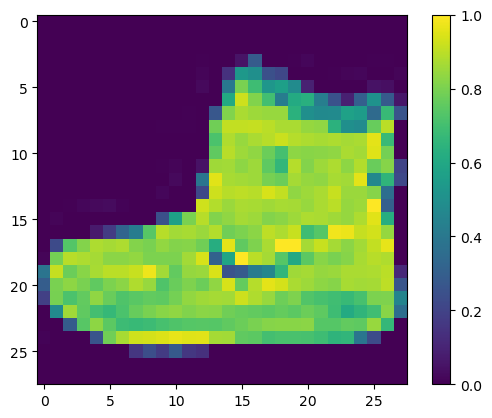

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(len(train_labels))
print(train_labels)

print(test_images.shape)
print(len(test_labels))
print(test_labels)

# normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

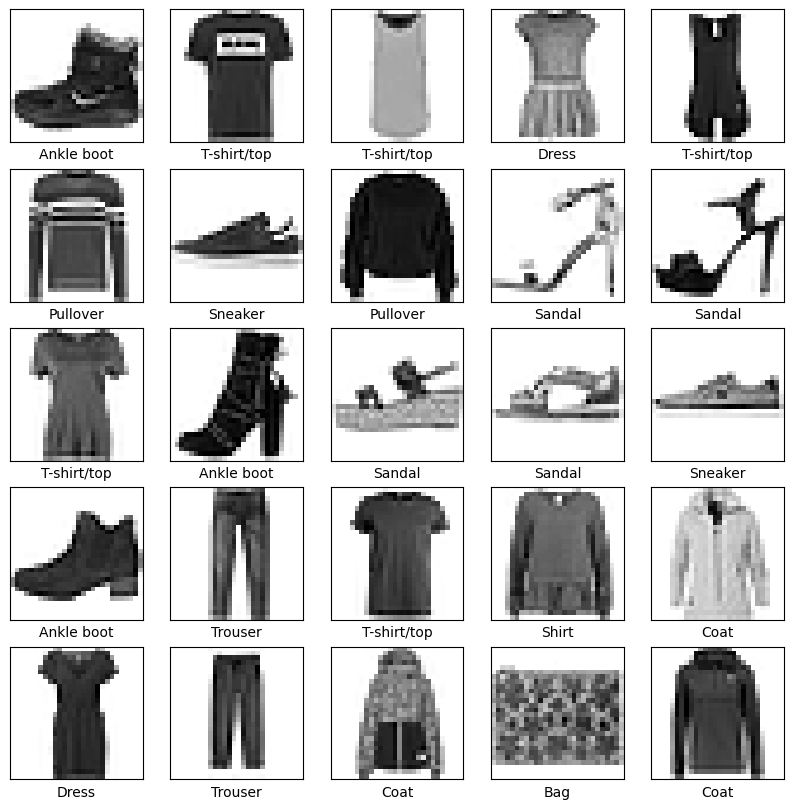

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)



Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4990 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3730 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3360 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3139 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2971 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2802 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2686 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2474 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0

Evaluate accuracy

In [5]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3342 - accuracy: 0.8831 - 715ms/epoch - 2ms/step

Test accuracy: 0.8830999732017517


Make predictions

In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])
# the model is most confident that this image is an ankle boot, or class_names[9]
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[8.1367005e-05 3.1774846e-06 3.0692084e-07 7.9188407e-09 5.1351151e-05
 2.1186383e-03 2.4635052e-05 1.4299767e-02 2.8635407e-07 9.8342043e-01]
9
9


Define functions to graph the full set of 10 class predictions.

In [8]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

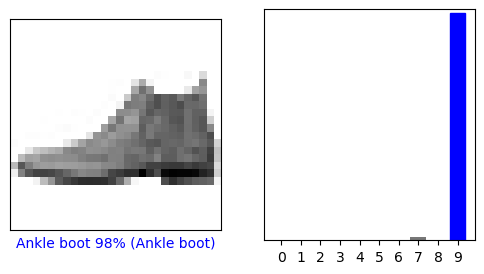

In [9]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

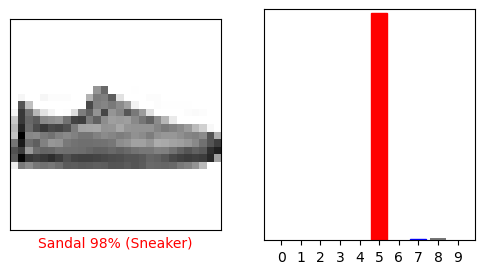

In [10]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

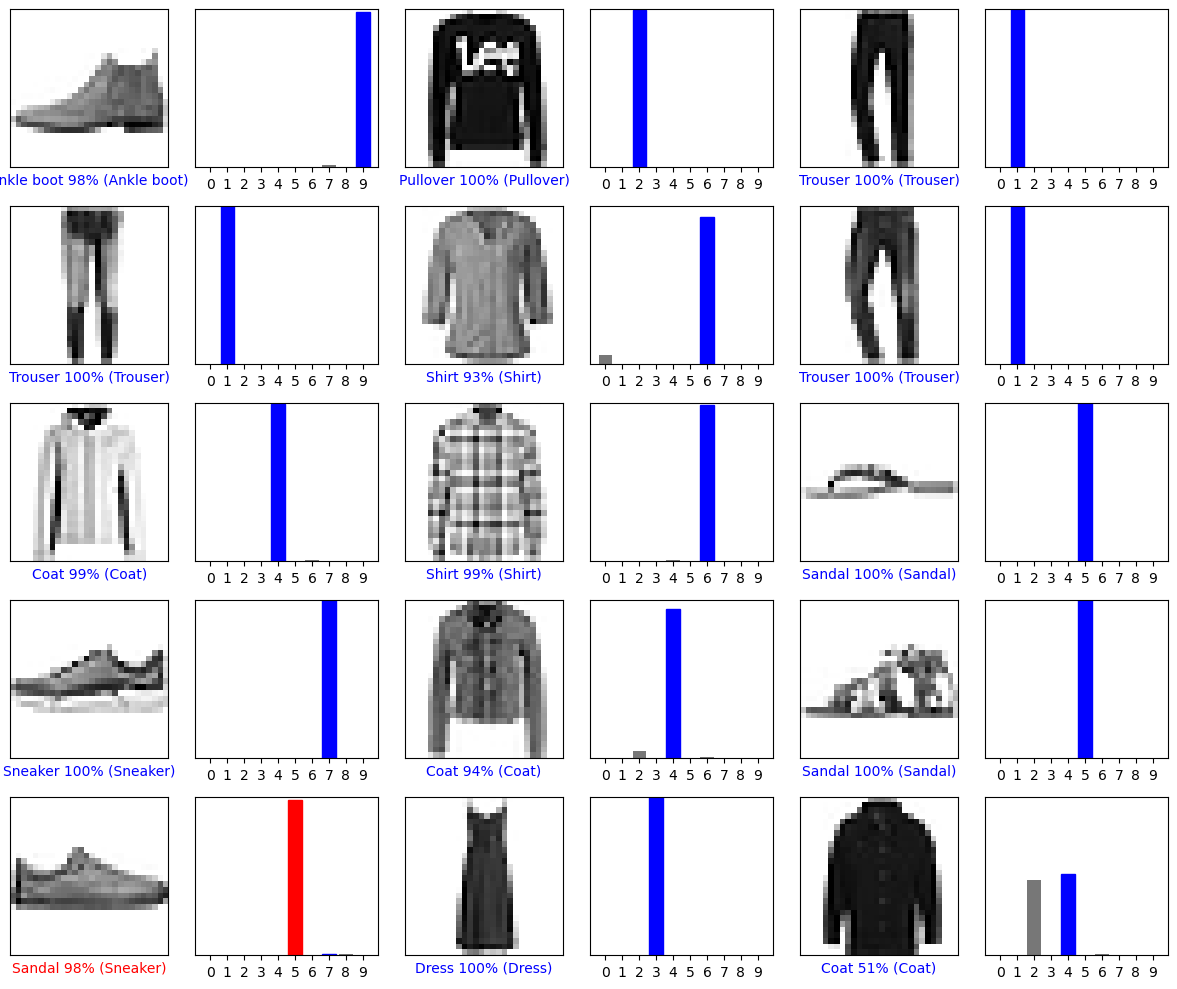

In [11]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model

In [12]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [13]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [14]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 28ms/step
[[4.2219622e-06 9.2586442e-13 9.9599421e-01 3.4724901e-12 3.5394975e-03
  1.5460388e-13 4.6208347e-04 2.3651420e-17 1.9773467e-12 1.5331480e-12]]


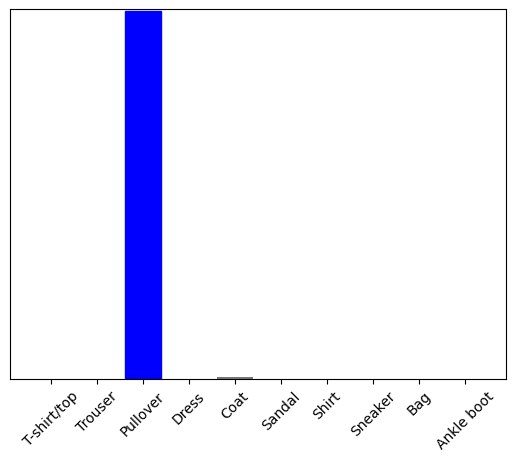

In [15]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [16]:
np.argmax(predictions_single[0])

2